In [21]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
import cv2 as cv
import pandas as pd
import Analytics

In [22]:
# First the DIC contours:
dic_frames = Analytics.load_frames(f'/mnt/c/Users/hfriz/OneDrive/Documents/AcademicsResearchProjects/StanfordGenetics-Neutraphils/40XData9-26/DIC',121)
dic_df = Analytics.cell_stats(dic_frames)

In [23]:
print('Number of cells in frame 0:\n', len(dic_frames[0]))
print('Number of cells in frame 240:\n', len(dic_frames[120]))

Number of cells in frame 0:
 272
Number of cells in frame 240:
 339


Text(0.5, 1.0, 'Frame 120 Brightfield')

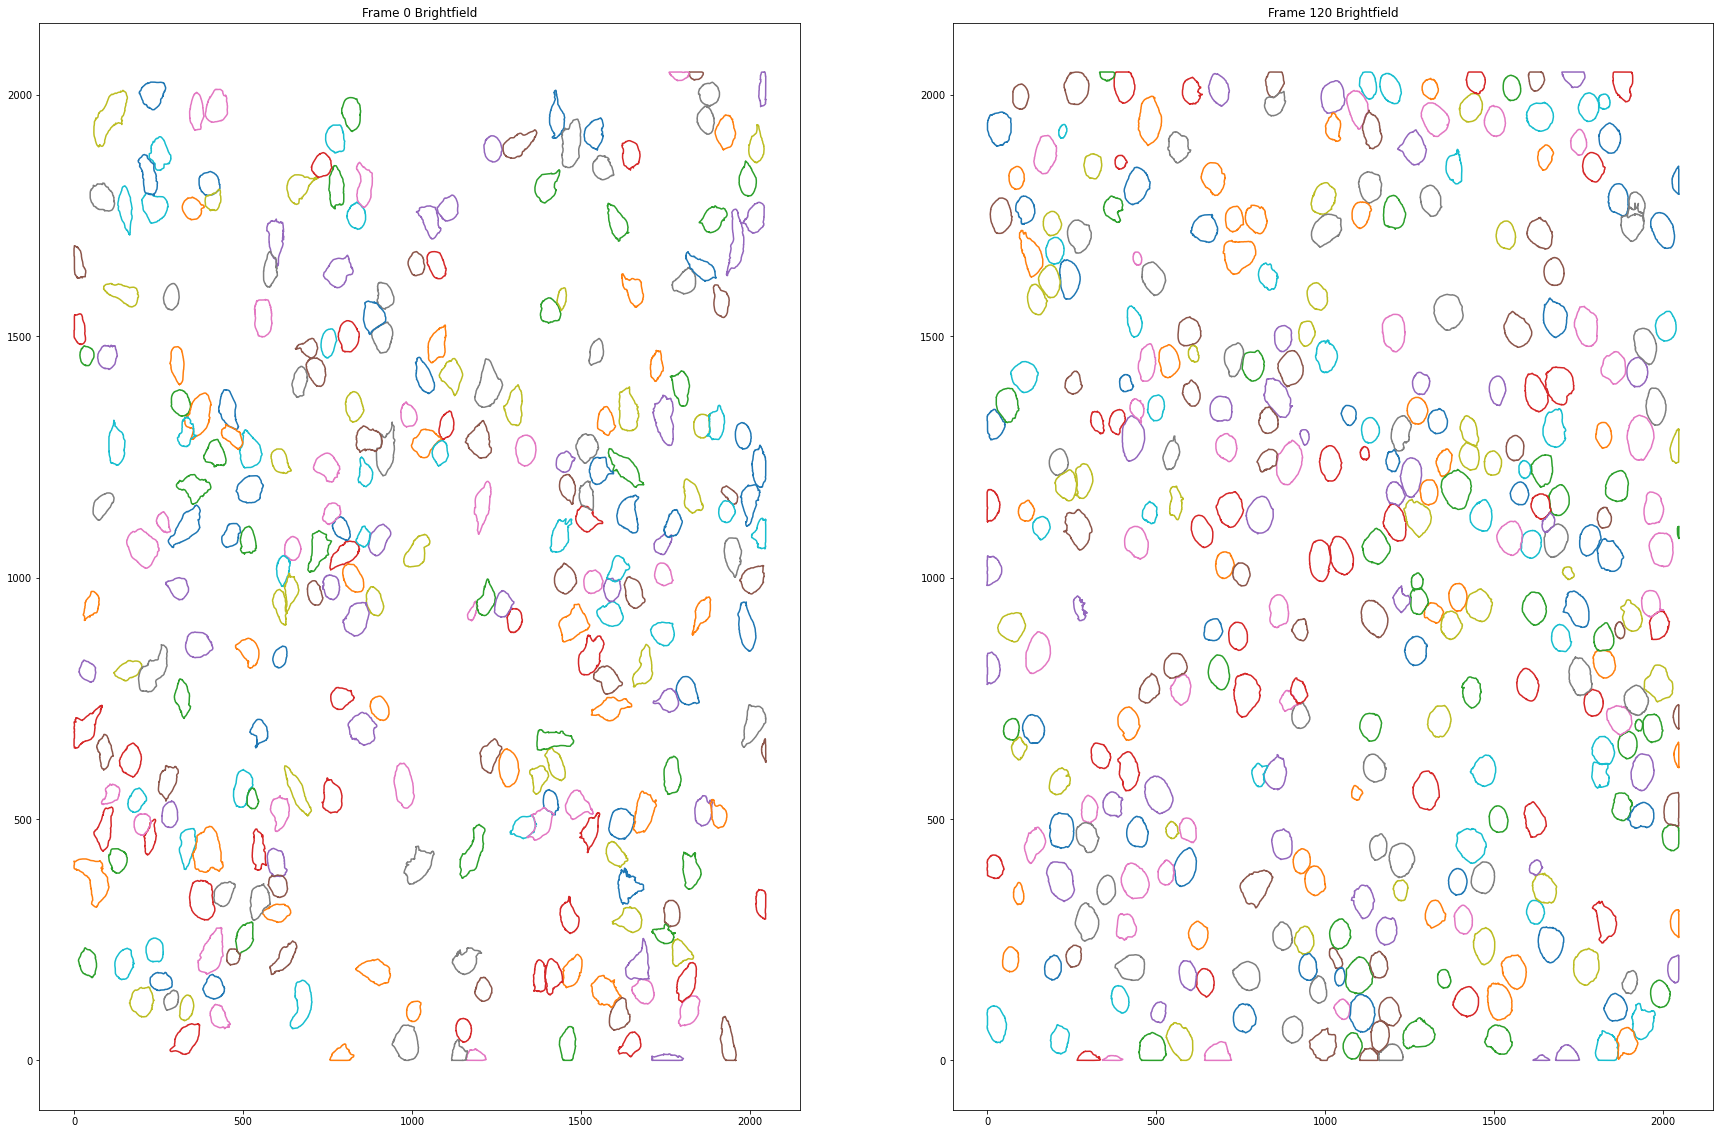

In [28]:
f, (ax, bx) = plt.subplots(1,2, figsize=(30,20))
for i in range(len(dic_frames[0])):
    ax.plot(dic_frames[0][i,:,0],dic_frames[0][i,:,1])
for i in range(len(dic_frames[120])):
    bx.plot(dic_frames[120][i,:,0],dic_frames[120][i,:,1]) 
ax.set_title('Frame 0 Brightfield')
bx.set_title('Frame 120 Brightfield')

Text(0.5, 1.0, 'Frame 0 Contours and Centroids')

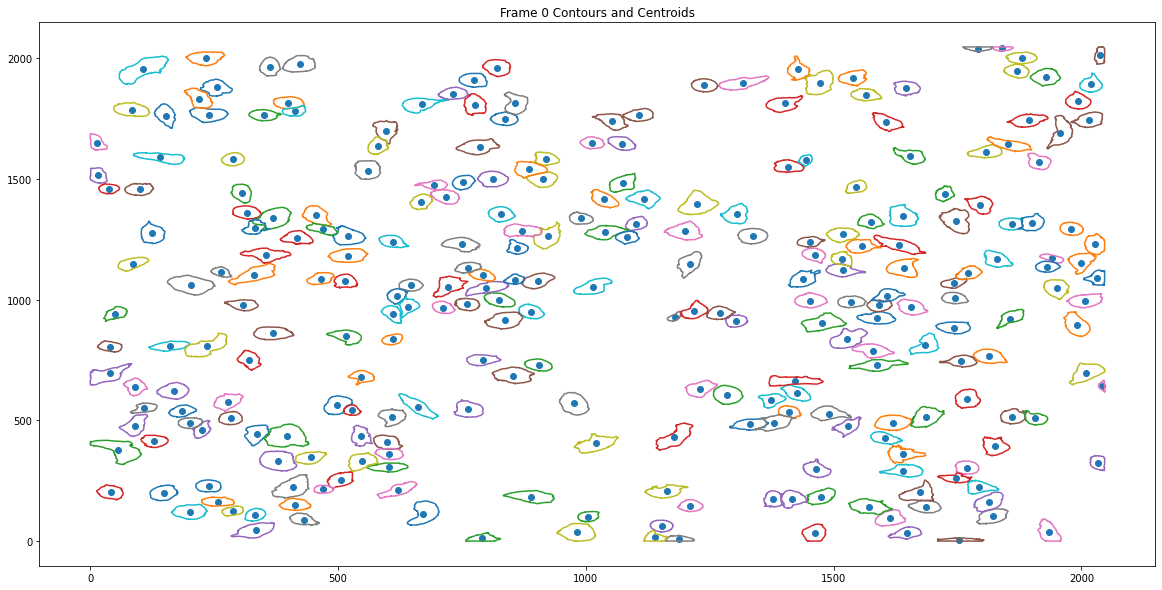

In [42]:
g, bx = plt.subplots(1,figsize=(20,10))
bx.plot(dic_df.loc[dic_df['frame']==0]['xcoord'],dic_df.loc[dic_df['frame']==0]['ycoord'],'o')
for i in range(dic_frames[0].shape[0]):
    bx.plot(dic_frames[0][i,:,0],dic_frames[0][i,:,1])
bx.set_title('Frame 0 Contours and Centroids')

In [19]:
dic_df

,frame,cell,area,centroid,xcoord,ycoord
0,0,0,1981.343965,"(1979.8295, 1293.2507)",1979.829468,1293.250732
0,0,1,2058.845734,"(904.86414, 728.88666)",904.864136,728.886658
0,0,2,2551.149527,"(1462.0245, 34.006386)",1462.024536,34.006386
0,0,3,1727.285623,"(1152.9823, 62.666466)",1152.982300,62.666466
0,0,4,2206.445397,"(1239.1356, 1887.3387)",1239.135620,1887.338745
...,...,...,...,...,...,...
120,120,334,1492.916258,"(1226.403, 951.838)",1226.402954,951.838013
120,120,335,4314.949704,"(269.84348, 1097.6534)",269.843475,1097.653442
120,120,336,2850.774615,"(141.26767, 448.43094)",141.267670,448.430939
120,120,337,2099.798891,"(544.7608, 1254.1901)",544.760803,1254.190063


In [4]:
dic_stats = Analytics.sample_ch_stats(dic_df, title = 'DIC', frame_counts=True)

In [7]:
# Now the FITC data
fitc_frames = Analytics.load_frames(f'/mnt/c/Users/hfriz/OneDrive/Documents/AcademicsResearchProjects/StanfordGenetics-Neutraphils/40XData9-26/FITC',121)
fitc_df = Analytics.cell_stats(fitc_frames)
fitc_stats = Analytics.sample_ch_stats(fitc_df, title = "FITC", frame_counts = True)

In [14]:
df = pd.concat([dic_stats,fitc_stats], axis=1)

In [43]:
df

,DIC,FITC
frame 0 Count,272.000000,26.000000
frame 1 Count,272.000000,24.000000
frame 2 Count,283.000000,16.000000
frame 3 Count,284.000000,14.000000
frame 4 Count,296.000000,18.000000
...,...,...
Std Count,18.777973,15.431308
Avg Count ROC,0.558333,-0.191667
Min Gini Index,0.247003,0.610784
Max Gini Index,0.348216,0.990000
